In [63]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import time
from scipy import stats
from scipy.stats import norm
from scipy.stats import uniform
import warnings
import scipy.integrate as integrate

warnings.simplefilter('ignore')
import math
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['legend.fontsize'] = 16

# APMTH 207: Advanced Scientific Computing: 
## Stochastic Methods for Data Analysis, Inference and Optimization
## Homework #5
**Harvard University**<br>
**Spring 2017**<br>
**Instructors: Rahul Dave**<br>
**Due Date: ** Thursday, March 2nd, 2017 at 11:59pm

**Instructions:**

- Upload your final answers as well as your iPython notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

## Problem 1: Monte Carlo and Simulation Revisited
In Homework #2, we used simulation to compute the expected values of functions of random variables. That is, given a random variable $X$, defined over $\mathbb{R}$, distributed according to the pdf $f_X$, and given a real-valued function of $X$, $h(X)$, we approximated $\mathbb{E}[h(X)]$ as follows
$$
\mathbb{E}[h(X)] = \int_{\mathbb{R}} h(x)f_X(x) dx \approx \frac{1}{N} \sum_{i=1}^N h(X_i), \quad X_i \sim f_X
$$

Now, suppose that, instead of being given the distribution $f_X$ and $h(X)$, you were simply asked to evaluate the following complex integral:
$$
I=\int_{0}^{\infty} \frac{x^4\, \sin\left(\sqrt{\ln{(x+1)}}\right)e^{-x}}{2+(x-4)^2} \, dx 
$$
A clever way to apply our Monte Carlo techniques would be to split the integrand as $h(x)f_X(x)$, and then approximate the integral as we have done in Homework #2:
$$
I = \int_{0}^{\infty} h(x)\,f_X(x) dx  \approx \frac{1}{N} \sum\limits_{i=1}^{N} h(X_i)$$ 
where the $X_i$'s are independently drawn from $f_X(x)$. 

We denote the approximation of the integral as follows
$$\hat{I} = \frac{1}{N} \sum\limits_{i=1}^{N} h(X_i), \quad X_i \sim f_X.$$


### Part A:

Rewrite your integrand as a product of two functions, $h(x)g(x)$, which can then be expressed as $h(x)f_X(x)$, where $f_X$ is a pdf (you may use one of the splits we propose in Part B or create your own). Explain why your choice of $h$ is appropriate. Explain why your choice of $g$ is appropriate for creating a pdf $f_X$.

(**Hint:** think about what you would have to do do turn $g$ into a good pdf and $h$ into a function that can be evaluated at multiple samples from this pdf. Think about how to choose these two functions to make your Monte Carlo approximation of $I$ as accurate as possible.)


### Part B:

- Use $\frac{1}{2+(x-4)^2}$ to create your pdf $f_X$. Implement a Metropolis algorithm to sample from $f_X$. Run the simulation 50 times for 150,000 points. Report the value of $\hat{I}$ and that of Var[${\hat{I}}$].


- Use $xe^{-x}$ to create your pdf $f_X$. Implement a Metropolis algorithm to sample from $f_X$. Run the simulation 50 times for 150,000 points. Report the value of $\hat{I}$ and that of Var[${\hat{I}}$].


- Compare the variance of your two estimates. Which choice of $f_X$ is better? Explain why.

### Part A

The integrand can be rewritten as a product of two functions:

$$ 
I=\int_{0}^{\infty} h_(x)g_(x)\, dx 
$$

In deciding on an appropriate split to make the Monte Carlo approximation of  $I$  as accurate as possible:
- the support of $g(x)$ should include the full support of $h(x)$
- $g(x)$ should either already be a pdf or it should be integrable so the normalising constant can be calculated to turn it into a pdf
- the peaks of $g(x)$ should be in regions where $h(x)$ is changing rapidly/has most mass - we need as many values as possible where the function is high

An appropriate choice for h(x) would be :

$$ h(x) =  \frac{x^3\, \sin\left(\sqrt{\ln{(x+1)}}\right)}{2+(x-4)^2} $$

and the corresponding $g(x)$ would be :

$$ g(x) = xe^{-x} $$

as this is already a valid pdf. 


### Part B

Option 1:

$$ h_1(x) = x^4\, \sin\left(\sqrt{\ln{(x+1)}}\right)e^{-x} $$

$$ g_1(x) =  \frac{1}{2+(x-4)^2} $$

The pdf $f_{X1}(x)$ is found by normalising the function $g_1(x)$

$$ f_{X1}(x) = \frac{1}{1.9811}\frac{1}{2+(x-4)^2} $$

Therefore the integral becomes:

$$ 
I= 1.9811 \int_{0}^{\infty} h_1(x)f_{X1}(x)\, dx 
$$

$$\hat{I} = 1.9811 \times \frac{1}{N} \sum\limits_{i=1}^{N} h_1(X_i), \quad X_i \sim f_{X1}.$$

Option 2:

$$ g_2(x) = xe^{-x} $$

$$ h_2(x) =  \frac{x^3\, \sin\left(\sqrt{\ln{(x+1)}}\right)}{2+(x-4)^2} $$

The pdf $f_{X2}(x)$ is the same as $g_2(x)$ as the normalising factor is 1. 

$$ f_{X2}(x) = xe^{-x} $$

Therefore the integral becomes:

$$ 
I= \int_{0}^{\infty} h_2(x)f_{X2}(x)\, dx 
$$

$$\hat{I} = \times \frac{1}{N} \sum\limits_{i=1}^{N} h_2(X_i), \quad X_i \sim f_{X2}.$$


In [134]:
def metropolis(p, qdraw, nsamp, xinit):
    total_acceptance = 0
    samples=np.empty(nsamp)
    x_prev = xinit
    for i in range(nsamp):
        x_star = qdraw(x_prev)
        p_star = p(x_star)
        p_prev = p(x_prev)
        pdfratio = p_star/p_prev
        if np.random.uniform() < min(1, pdfratio):
            samples[i] = x_star
            x_prev = x_star
        else:#we always get a sample
            samples[i]= x_prev
            total_acceptance += 1
            
    return samples,total_acceptance

In [135]:
### look at correlation and thinning 
def corrplot(trace, maxlags=50):
    plt.acorr(trace-np.mean(trace),  normed=True, maxlags=maxlags);
    plt.xlim([0, maxlags])

## Option 1

In [136]:
# define distributions 

g_1 = lambda x: (1/(2 + (x-4)**2))

print(integrate.quad(fx1, 0, np.inf)[0]) #Need to normalize
norm = integrate.quad(fx1, 0, np.inf)[0]

f_1 = lambda x: g_1(x)/norm
h_1 = lambda x: (x**4)*np.sin(np.sqrt(np.log(x+1)))*np.exp(-x)

1.9811404859066946


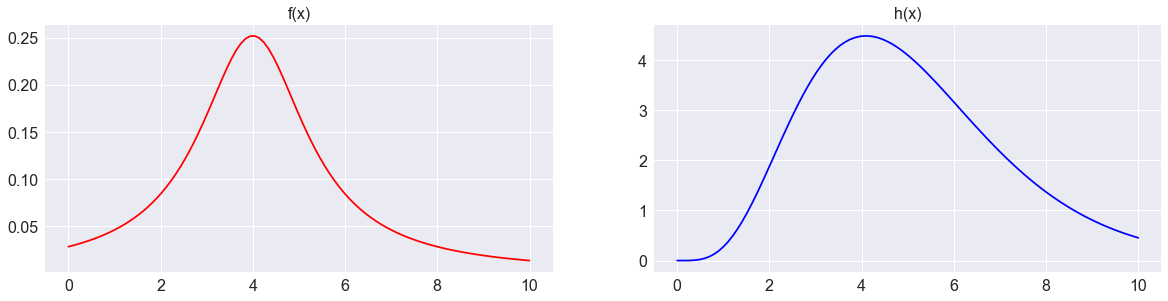

In [137]:
## view h(x) and g(x)
plt.figure(figsize=(20,10))
xxx= np.linspace(0,10,100)
plt.subplot(221)
plt.plot(xxx, f_1(xxx), 'r')
plt.title('f(x)')
plt.subplot(222)
plt.plot(xxx, h_1(xxx), 'b')
plt.title('h(x)')

In [138]:
x0=np.random.uniform()
n_samples = 1000000
samps_normprop, acceptance = metropolis(f_1, norm_prop, n_samples, x0)

In [139]:
# reject all samples below 0 as the integral is from 0 to infinity:
samps_normprop_pos = np.asarray([s for s in samps_normprop if s >0 ])

print('number of samples greater than 0 :', len(samps_normprop_pos))
print('% thrown away ', (len(samps_normprop) - len(samps_normprop_pos))/len(samps_normprop)*100)

number of samples greater than 0 : 889378
% thrown away  11.0622


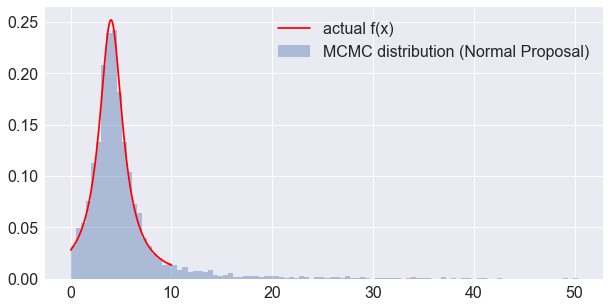

In [140]:
burnin = 20000
thin = 200
samps_normprop_pos_thinned = samps_normprop_pos[burnin::thin]
plt.figure(figsize=(10,5))
plt.hist(samps_normprop_pos_thinned,bins=100, alpha=0.4, label=u'MCMC distribution (Normal Proposal)', normed=True) 
plt.plot(xxx, f_1(xxx), 'r', label='actual f(x)')
plt.legend()

In [141]:
## Evaluate integral 
I = (g_1_norm/len(samps_normprop_pos_thinned))*np.sum(h_1(samps_normprop_pos_thinned))
print('Integral (normal proposal)', I)

Integral (normal proposal) 6.04409501392


In [142]:
num_simulations = 50
num_points = 150000
xinit = 0.0

acceptance_list = []
mean_list = []
for i in range(num_simulations):
    samples, total_acceptance = metropolis(f_1, norm_prop, num_points, xinit)
    mean_list.append(np.nanmean(h1(samples)*norm))
    acceptance_list.append(total_acceptance)

In [143]:
print("Average number of points being accepted is " ,np.mean(acceptance_list))
print("mean of I ", np.mean(mean_list))
print("variance of I ", np.var(mean_list))

Average number of points being accepted is  15902.22
mean of I  6.08626501104
variance of I  0.0582894696808


## Option 2

In [144]:
## define distributions
f_2 = lambda x: (x*np.exp(-x))
h_2 = lambda x: ((x**3)*np.sin(np.sqrt(np.log(x+1))))/(2 + (x-4)**2)

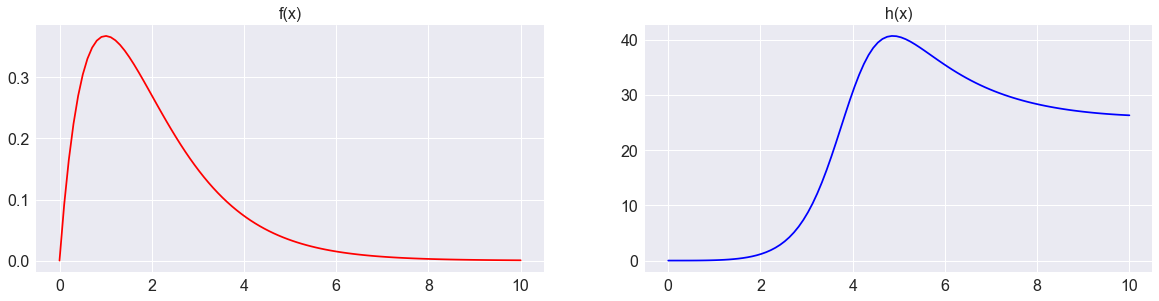

In [145]:
## view h(x) and g(x)
plt.figure(figsize=(20,10))
xxx= np.linspace(0,10,100)
plt.subplot(221)
plt.plot(xxx, f_2(xxx), 'r')
plt.title('f(x)')
plt.subplot(222)
plt.plot(xxx, h_2(xxx), 'b')
plt.title('h(x)')

In [146]:
x0=np.random.uniform()
n_samples = 1000000
def normprop2(x):
    return np.random.normal(x, 0.5) 
samps_normprop2, acceptances_2 = metropolis(f_2, normprop2, n_samples, x0)

# reject all samples below 0 as the integral is from 0 to infinity:
samps_normprop_pos2 = np.asarray([s for s in samps_normprop2 if s >0 ])

print('number of samples greater than 0 :', len(samps_normprop_pos2))
print('% thrown away ', (len(samps_normprop2) - len(samps_normprop_pos2))/len(samps_normprop2)*100)

number of samples greater than 0 : 1000000
% thrown away  0.0


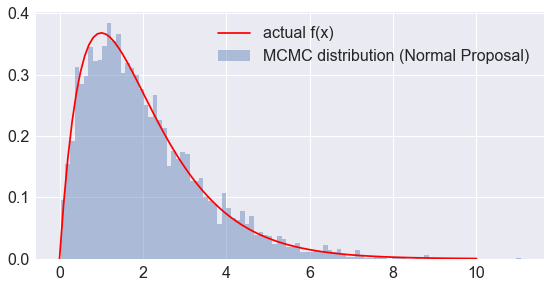

In [147]:
burnin = 20000
thin = 200
samps_normprop_pos_thinned2 = samps_normprop_pos2[burnin::thin]
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.hist(samps_normprop_pos_thinned2,bins=100, alpha=0.4, label=u'MCMC distribution (Normal Proposal)', normed=True) 
plt.plot(xxx, f_2(xxx), 'r', label='actual f(x)')
plt.legend()

In [148]:
simulations = 50
points = 150000
xinit = 0.0

acceptance_list = []
mean_list = []
for i in range(simulations):
    samples, total_acceptance = metropolis(f_2, prop, points, xinit)
    mean_list.append(np.nanmean(h_2(samples)))
    acceptance_list.append(total_acceptance)

In [149]:
print("Average number of points being accepted is " ,np.mean(acceptance_list))
print("mean of I ", np.mean(mean_list))
print("variance of I ", np.var(mean_list))

Average number of points being accepted is  40884.78
mean of I  6.02772286669
variance of I  0.0176286692112


## Which choice of f is better?

Comparing the two splits, the integral calculated using $f_{X2}$ has resulted in an estimate with lower variance compared with $f_{X1}$ (reduction of over 50%). A much larger number of samples are accepted when sampled from $f_{X2}$ compared to $f_{X1}$. 

Although the proposal $f_1(x)$ has a peak at the peak of $h_1(x)$, there is a lot of weight in the tails of $f_1(x)$ on the positive support. This results in many samples being drawn in the region where $h_1(x)$ does not have large density and results in increased variance in the estimate of the integral. 

In the second split, $f_2(x)$ decays quickly to 0 and has high mass in the region where $h_2(x)$ is changing most rapidly and hence more samples are drawn in the important region of $h_2(x)$. This results in decreased variance. 

## Problem 2: Metropolis Algorithm

Suppose we ask you to memorize the order of the top five movies on IMDB. When we quiz you on the order afterwards, you might not recall the correct order, but the mistakes you will tend to make in your recall can be modeled by simple probabilistic models.
  
Let's say that the top five movies are:  
1. *The Shawshank Redemption*
2. *The Godfather*
3. *The Godfather: Part II*
4. *The Dark Knight*
5. *Pulp Fiction*

Let's represent this ordering by the vector $\omega = (1,2,3,4,5)$. 

If you were to mistakenly recall the top five movies as:
2. *The Godfather*
3. *The Godfather: Part II*
5. *Pulp Fiction*
4. *The Dark Knight*
1. *The Shawshank Redemption*

We'd represent your answer by the vector $\theta = (2,3,5,4,1)$.

Now, we have a way of quantifying how wrong your answer can be. We define the Hamming distance between two top five rankings, $\theta, \omega$, as follows:
$$d(\theta, \omega) = \sum_{i=1}^5 \mathbb{I}_{\theta_i\neq \omega_i},$$ 
where $\mathbb{I}_{\theta_i\neq \omega_i}$ is the indicator function that returns 1 if $\theta_i\neq \omega_i$, and 0 otherwise.

For example, the Hamming distance between your answer and the correct answer is $d(\theta, \omega)=4$, because you only ranked *The Dark Knight* is correctly. 

Finally, let's suppose that the probability of giving a particular answer (expressed as $\theta$) is modeled as
$$ p(\theta \,|\, \omega, \lambda) \propto  e^{-\lambda\, d(\theta,\, \omega)}.$$

### Part A:

Implement an Metropolis algorithm to produce sample guesses from 500 individuals, with various $\lambda$ values, $\lambda=0.2, 0.5, 1.0$. What are the top five possible guesses?

In [105]:
w = [1,2,3,4,5]
p = lambda t,l: np.exp(-l*np.sum(t != w))

In [106]:
# blockwise updating 
def metropolis_sampler(p, l, nsamp, xinit):
    samples=np.empty((nsamp, 5))
    x_prev = xinit
    accepted=0
    for i in range(nsamp):
        x_star = np.copy(x_prev)
        np.random.shuffle(x_star)
        p_star = p(x_star,l)
        p_prev = p(x_prev,l)
        pdfratio = p_star/p_prev
        if np.random.uniform() < min(1, pdfratio):
            samples[i] = x_star
            x_prev = x_star
            accepted +=1
        #we always get a sample
        else:
            samples[i]= x_prev
            
    return samples, accepted

In [107]:
import collections, operator
def count_unique(A):
    d = collections.OrderedDict()
    for a in A:
        t = tuple(a)
        if t in d:
            d[t] += 1
        else:
            d[t] = 1
    sorted_counts = sorted(d.items(), key=operator.itemgetter(1))
    return sorted_counts

In [108]:
xinit = np.array([2,3,5,4,1])

### Run the sampler for 70000 iterations, discarding 20,000 for burnin and thinning the rest every 100 samples

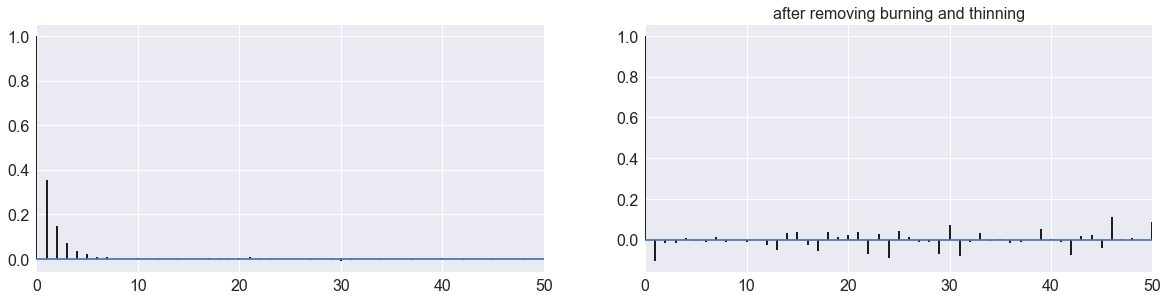

In [110]:
plt.figure(figsize=(20,10))
plt.subplot(221)

lmbda = 0.2
samps_02, accepted_02 = metropolis_sampler(p, lmbda, 70000, xinit)
samples_prob = [p(theta, lmbda) for theta in samps_02]
corrplot(samples_prob)

# thin and remove burnin 
plt.subplot(222)
thin=100
burnin = 20000
samples_prob_thinned = samples_prob[burnin::thin]
corrplot(samples_prob_thinned)
plt.title('after removing burning and thinning')
#thin the samples 
samps_02_thinned = samps_02[burnin::thin]

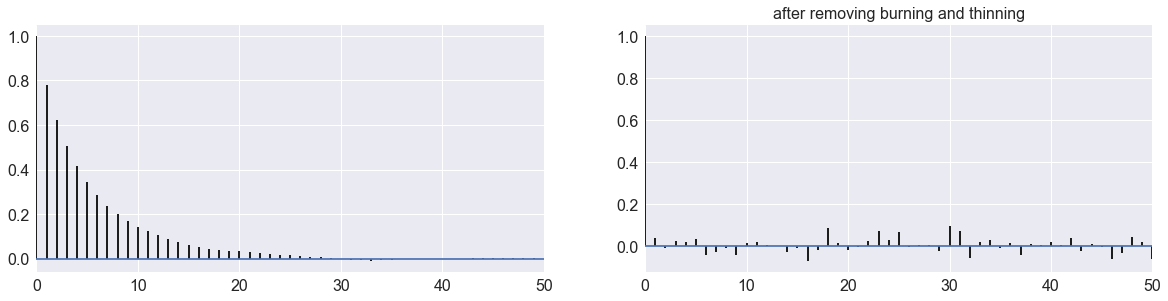

In [111]:
plt.figure(figsize=(20,10))
plt.subplot(221)

lmbda = 0.5
samps_05, accepted_05 = metropolis_sampler(p, lmbda, 70000, xinit)
samples_prob = [p(theta, lmbda) for theta in samps_05]
corrplot(samples_prob)

# thin and remove burnin 
plt.subplot(222)
thin=100
burnin = 20000
samples_prob_thinned = samples_prob[burnin::thin]
corrplot(samples_prob_thinned)
plt.title('after removing burning and thinning')
#thin the samples 
samps_05_thinned = samps_05[burnin::thin]

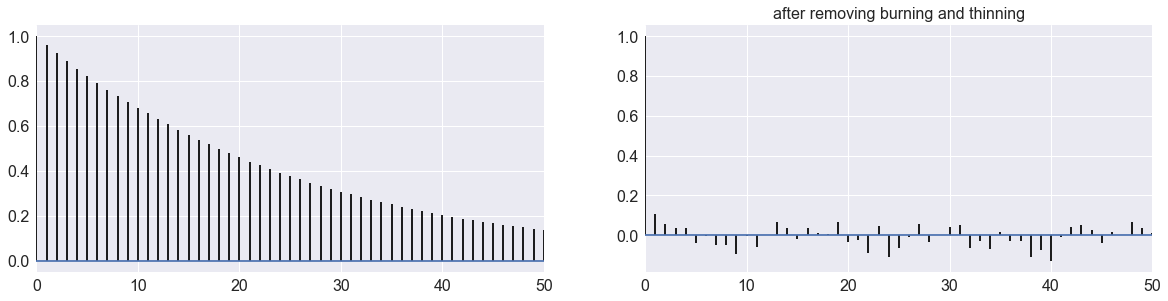

In [112]:
plt.figure(figsize=(20,10))
plt.subplot(221)

lmbda = 1
samps_10, accepted_10 = metropolis_sampler(p, lmbda, 70000, xinit)
samples_prob = [p(theta, lmbda) for theta in samps_10]
corrplot(samples_prob)

# thin and remove burnin 
plt.subplot(222)
thin=100
burnin = 20000
samples_prob_thinned = samples_prob[burnin::thin]
corrplot(samples_prob_thinned)
plt.title('after removing burning and thinning')
#thin the samples 
samps_10_thinned = samps_10[burnin::thin]

In [113]:
l_02 = count_unique(samps_02_thinned)
l_05 = count_unique(samps_05_thinned)
l_10 = count_unique(samps_10_thinned)

In [115]:
print("lambda = 0.2\n")
[row for row in l_02[-5:]][::-1]

lambda = 0.2



[((1.0, 2.0, 3.0, 5.0, 4.0), 11),
 ((1.0, 2.0, 5.0, 3.0, 4.0), 10),
 ((5.0, 2.0, 3.0, 4.0, 1.0), 9),
 ((3.0, 2.0, 1.0, 5.0, 4.0), 9),
 ((2.0, 1.0, 3.0, 5.0, 4.0), 8)]

In [116]:
print("lambda = 0.5\n")
[row for row in l_05[-5:]][::-1]

lambda = 0.5



[((1.0, 2.0, 3.0, 4.0, 5.0), 27),
 ((1.0, 2.0, 4.0, 3.0, 5.0), 15),
 ((3.0, 2.0, 1.0, 4.0, 5.0), 12),
 ((1.0, 3.0, 2.0, 4.0, 5.0), 11),
 ((1.0, 5.0, 2.0, 4.0, 3.0), 11)]

In [117]:
print("lambda = 1.0\n")
[row for row in l_10[-5:]][::-1]

lambda = 1.0



[((1.0, 2.0, 3.0, 4.0, 5.0), 97),
 ((1.0, 4.0, 3.0, 2.0, 5.0), 21),
 ((1.0, 2.0, 5.0, 4.0, 3.0), 18),
 ((2.0, 1.0, 3.0, 4.0, 5.0), 18),
 ((1.0, 5.0, 3.0, 4.0, 2.0), 15)]

## Observations:

As the value of lambda increases, a much larger number of guesses are the correct guess. This is because larger lambda reduces the value of the posterior when there are a large number of incorrect guesses. If the new value of x, x_star, has a larger number of incorrect guesses than x_prev, the pdfratio will be smaller than 1 and so x_star will be less likely to be accepted and x_prev will be saved as the sample for that particular iteration. 

### Part B:
Compute the probability that *The Shawshank Redemption* is ranked as the top movie (ranked number 1) by the Metropolis algorithm sampler. Compare the resulting probabilities for the various different $\lambda$ values. Summarize your findings.

In [118]:
def count_prob(A, index, val):
    count = 0
    for a in A:
        if a[index] == val:
            count += 1
    return count

In [119]:
def count_correct(unique_list, match):
    for l in unique_list:
        if l[0] == match:
            return l[1]

In [125]:
l_02_prob = (count_prob(samps_02_thinned, 0, 1)/500)
l_05_prob = (count_prob(samps_05_thinned, 0, 1)/500)
l_10_prob = (count_prob(samps_10_thinned, 0, 1)/500)

In [129]:
print ('Probability that The Shawshank Redemption is ranked as the top movie')
print('Lambda = 0.2, probability = ', l_02_prob*100, '%')
print('Lambda = 0.5, probability = ', l_05_prob*100, '%')
print('Lambda = 1.0, probability = ', l_10_prob*100, '%')

Probability that The Shawshank Redemption is ranked as the top movie
Lambda = 0.2, probability =  25.8 %
Lambda = 0.5, probability =  33.6 %
Lambda = 1.0, probability =  52.0 %


In [132]:
w_tup = tuple((1.0, 2.0, 3.0, 4.0, 5.0))
l_02_prob_correct = count_correct(l_02, w_tup)/len(samps_02_thinned)
l_05_prob_correct = count_correct(l_05, w_tup)/len(samps_05_thinned)
l_10_prob_correct = count_correct(l_10, w_tup)/len(samps_10_thinned)

In [133]:
print ('Probability of all ratings being correct')
print('Lambda = 0.2, probability = ', l_02_prob_correct*100, '%')
print('Lambda = 0.5, probability = ', l_05_prob_correct*100, '%')
print('Lambda = 1.0, probability = ', l_10_prob_correct*100, '%')

Probability of all ratings being correct
Lambda = 0.2, probability =  1.4000000000000001 %
Lambda = 0.5, probability =  5.4 %
Lambda = 1.0, probability =  19.400000000000002 %


## Observations:

As lambda increases, the number of fully correct guesses increases to 19%, with the first movie being correctly 
placed 52% of the time. 

The probability of theta (an incorrect guess) decreases with increasing lambda. If the new guess x_star is closer to the correct solution than x_prev, the pdfratio will be above 1 so you are bound to accept the new guess. For high lambda, if x_star is further from the correct guess than xprev, then the pdfratio will be very small so you are likely to reject the new guess. You will therefore have more examples where the ordering is close to the correct result (or the correct result itself). As The Shawshank Redemption is 1 in the original it is more likely to be in position 1 with increasing lambda. 